## Analise de Dados dos sobreviventes do Titanic e Estátisticas

In [184]:
## importações utilizadas no projeto

from sklearn.linear_model import LogisticRegression
                            
# Manuseio dos dados
import numpy as np
import pandas as pd
 
# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 
# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             recall_score,
                             precision_score)

### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

alguns métodos que podemos usar:

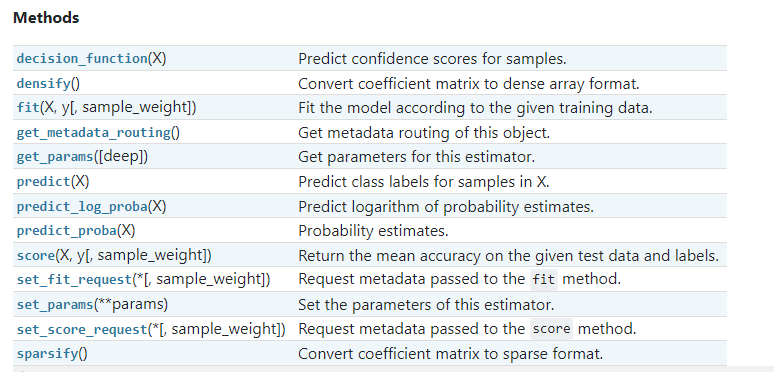

## Titanic Datasets

In [154]:
# Importando os arquivos csv's do Kaggle
titanic_treino = pd.read_csv('train.csv')
titanic_treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [155]:
titanic_teste = pd.read_csv('test.csv')
titanic_teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [156]:
# Quantos sobreviveram e não sobreviveram
(titanic.Survived.value_counts() / titanic.shape[0]) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

## Tratando as tabelas e substituindo os valores vazios

In [157]:
## eliminando informações não importantes
titanic_treino = titanic_treino.drop(['Name','Ticket','Cabin'],axis=1)
titanic_teste = titanic_teste.drop(['Name','Ticket','Cabin'],axis=1) 

In [158]:
## Preencher os valores vazios com a média de idade dos passageiros

titanic_treino.loc[titanic_treino.Age.isnull(),'Age'] = titanic.Age.mean()
titanic_teste.loc[titanic_teste.Age.isnull(),'Age'] = titanic.Age.mean()

In [159]:
## Preencher os valores vazios com a média de idade dos passageiros

titanic_treino.loc[titanic_treino.Embarked.isnull(),'Embarked'] = titanic.Embarked.mode()[0]
titanic_teste.loc[titanic_teste.Embarked.isnull(),'Embarked'] = titanic.Embarked.mode()[0]

In [160]:
## Preencher os valores vazios com a média de idade dos passageiros

titanic_treino.loc[titanic_treino.Fare.isnull(),'Fare'] = titanic.Fare.mean()
titanic_teste.loc[titanic_teste.Fare.isnull(),'Fare'] = titanic.Fare.mean()

In [161]:
titanic_treino.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [162]:
titanic_teste.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

In [172]:
col_treino = titanic_treino.columns[titanic_treino.dtypes != 'object']
treino = titanic_treino.loc[:,col_treino]

In [173]:
col_teste = titanic_teste.columns[titanic_teste.dtypes != 'object']
teste = titanic_teste.loc[:,col_teste]

## Regressão Logistica

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = treino.drop(['PassengerId','Survived'],axis=1)
Y = titanic_treino.Survived

In [207]:
x_train, x_validation, y_train, y_validation = train_test_split(X,Y,test_size=0.33, random_state=42)

In [208]:
 reg_log = LogisticRegression(random_state=42)
 reg_log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [211]:
y_pred = reg_log.predict(x_validation)

In [213]:
acuracia = accuracy_score(y_validation, y_pred)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.7254 de acurácia.


## Modelagem
Agora vamos estimar uma regressão logística para investigar as chances de sobrevivência das pessoas dados 3 preditores:

* A idade da pessoa;

* A classe em que a pessoa viajava e

* O sexo da pessoa.

O modelo terá essa configuração:

In [215]:
# Transforma classe em categorico
titanic['Pclass'] = titanic['Pclass'].astype('category')

In [224]:
# Agora vamos fazer com sklearn para aproveitar as métricas
model = LogisticRegression(random_state=42)
baseline_df = titanic[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
y = baseline_df.Survived
X = pd.get_dummies(baseline_df[['Pclass', 'Sex', 'Age']], drop_first=True)
print(X)

      Age  Pclass_2  Pclass_3  Sex_male
0    22.0     False      True      True
1    38.0     False     False     False
2    26.0     False      True     False
3    35.0     False     False     False
4    35.0     False      True      True
..    ...       ...       ...       ...
885  39.0     False      True     False
886  27.0      True     False      True
887  19.0     False     False     False
889  26.0     False     False      True
890  32.0     False      True      True

[714 rows x 4 columns]


In [225]:
model.fit(X, y)

LogisticRegression(random_state=42)

In [226]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty='none', solver='newton-cg')

## Predições

In [227]:
# Predizendo as probabilidades
yhat = model.predict_proba(X)
yhat = yhat[:, 1] # manter somente para a classe positiva

In [228]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.7899 de acurácia.


In [234]:
eu = pd.DataFrame({'Age':12, 'Pclass_2':0, 'Pclass_3':0, 'Sex_male':1}, index=[0])
minha_prob = model.predict_proba(eu)
print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(minha_prob[:,1][0]*100, 2)))

Eu teria 65.43% de probabilidade de sobrevivência se estivesse no Titanic


In [236]:
coleguinha = pd.DataFrame({'Age':72, 'Pclass_2':0, 'Pclass_3':0, 'Sex_male':0}, index=[0])
prob_do_coleguinha = model.predict_proba(coleguinha)
print('Meu coleguinha teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(prob_do_coleguinha[:,1][0]*100, 2)))

Meu coleguinha teria 73.07% de probabilidade de sobrevivência se estivesse no Titanic
